In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display
from copy import deepcopy as dc
import numba as nb
import itertools

In [2]:
url='https://www.janestreet.com/puzzles/travel-agent-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[7]+"\n\n"+str("\n".join(y[8:9]))))

### Travel Agent

February 2016 : Puzzle

<img src="https://www.janestreet.com/puzzles/feb16_puzzle.png" width="350" >

In [3]:
fixed = np.array([[1, 5, 4, 4, 6, 1, 1, 4, 1, 3, 7, 5],
                  [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                  [4, 0, 6, 4, 1, 8, 1, 4, 2, 1, 0, 3],
                  [7, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2],
                  [1, 0, 1, 0, 6, 1, 6, 2, 0, 2, 0, 1],
                  [8, 0, 4, 0, 1, 0, 0, 8, 0, 3, 0, 5],
                  [4, 0, 2, 0, 5, 0, 0, 3, 0, 5, 0, 2],
                  [8, 0, 5, 0, 1, 1, 2, 3, 0, 4, 0, 6],
                  [6, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 6],
                  [3, 0, 6, 3, 6, 5, 4, 3, 4, 5, 0, 1],
                  [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
                  [2, 1, 6, 6, 4, 5, 2, 1, 1, 1, 7, 1]])

In [4]:
def roll(die,x,y,i,j):
    #['bot','frt','lft','rgt','bak','top']
    u = [5,1,3,4,6,2]
    d = [2,6,3,4,1,5]
    l= [3,2,6,1,5,4]
    r = [4,2,1,6,5,3]
        
    if x-1 == i and j==y:
        return [die[i-1] for i in u]
    elif x+1 == i and j==y:
        return [die[i-1] for i in d]
    elif x == i and j+1==y:
        return [die[i-1] for i in l]
    elif x == i and j-1==y:
        return [die[i-1] for i in r]

def neighbours(i,j,N):
    return [[i+x,j+y] for (x,y) in [(-1,0),(0,-1),(1,0),(0,1)] if i+x >= 0 and i+x < N and j+y >= 0 and j+y < N ]

In [5]:
def solve_grid(board,dice):
    N=board.shape[0]
    soln =[0,0]
    best_score = 0
    paths = [[board,dice,dice[0],0,0,1]] #board dice score,x,y,stp
    
    while len(paths) > 0:
        brd,d,s,x,y,step = paths.pop()
        
        if x == N-1 and y == N-1:
            if s > best_score:                
                soln = [brd,s]
                best_score = s
        else:
            for a,b in neighbours(x,y,N):
                new_d = roll(d,x,y,a,b)
                new_b = dc(brd)
                if (new_d[0] == new_b[a,b]) or (new_b[a,b] == 0):
                    new_s = s * new_d[0]
                    new_b[a,b] = -step
                    paths.append([new_b,new_d,new_s,a,b,step+1])          
    return soln

In [6]:
# define all possible dice given the starting square and first moves
dice = [[1,3,i,j,k,l] for i,j,k,l in itertools.product(range(6,9),repeat=4)]+ \
        [[1,i,j,5,k,l] for i,j,k,l in itertools.product(range(6,9),repeat=4)]

start= time.time()
max = 0
print("Loop through all possible dice")
for die in dice:
    grid,score = solve_grid(fixed,die)
    if score > max:
        max=score
        print("for die {} score is {:e}".format(die,score))

print("Iteration took {:.2f} seconds".format(time.time()-start))


Loop through all possible dice
for die [1, 3, 6, 6, 6, 6] score is 1.988675e+42
for die [1, 3, 7, 6, 6, 6] score is 1.264519e+43
for die [1, 3, 8, 6, 6, 6] score is 6.278106e+43
for die [1, 3, 8, 7, 6, 6] score is 3.354674e+48
Iteration took 18.34 seconds


In [7]:
url='https://www.janestreet.com/puzzles/travel-agent-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(x)])
display(Markdown("### "+x[8]+"\n\n"+"\n".join(x[10:13])))

### February 2016 : Solution

This month’s puzzle was, we thought, extremely challenging! We received a number
of different valid solutions. About half of these were equal to the highest
score we could find as well: about
3.35 X 10^48
. An illustration of that
solution is presented here. Congrats to everyone who managed to take a crack at
this month’s puzzle — we’ll be randomly picking a few submitters to receive Jane
Street t-shirts!


<img src="https://www.janestreet.com/puzzles/feb16_puzzle_solution_trimmed.png" width="400">


143


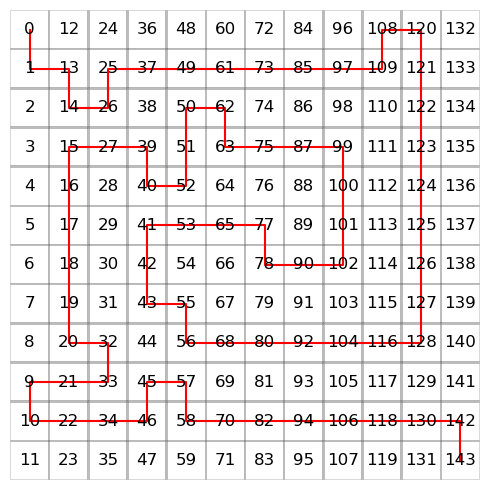

In [8]:
path =[0,1,13,14,26,25,37,49,61,73,85,97,109,108,120,121,122,123,124,125,126,127,128,116,104,92,80,68,56,55,43,42,41,53,65,
       77,78,90,102,101,100,99,87,75,63,62,50,51,52,40,39,27,15,16,17,18,19,20,32,33,21,9,10,22,34,46,45,57,58,70,82,94,106,
       118,130,142,143]+[143]*(143-77)

print(len(path))
n=12
board= [["" for i in range(n)] for j in range(n)]
for i in range(n**2):
    board[i % n][i // n] = i

fig,ax = plt.subplots(1,1,figsize=(5,5))    
ax =sns.heatmap(np.zeros((n,n)),annot=board,cbar=False,cmap='Greys',fmt="",linewidths=1,linecolor="k",annot_kws={"size":12,"color":"k"},alpha=.15)
ax.tick_params(left=False, bottom=False,labelleft=False, labelright=True)
ax.axis("off")
xpoints = [i //n+0.5 for i in path]
ypoints = [i % n+0.5 for i in path]
plt.plot(xpoints,ypoints,"r")
plt.tight_layout()
plt.show()   